In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from datetime import timedelta

df = pd.read_csv("../opnames.csv", delimiter=",")
df["date"] = pd.to_datetime(df["adm_icu"]).dt.day_of_year

df["hour"] = pd.to_datetime(df["adm_icu"]).dt.hour
# return (df["date"].value_counts() / len(df["date"]))[day]

In [5]:
df.head(10)

,ref_spec,adm_icu,dis_icu,los_icu,age,gender,nice_ap4_score,icu_death,plan_adm,date,hour
0,12,2015-10-17 20:22:00,2015-11-03 10:35:00,16.592361,51,F,28,0,0.0,290,20
1,12,2015-10-28 23:15:00,2015-11-05 14:46:00,7.646527,54,M,74,0,0.0,301,23
2,9,2015-10-30 14:40:00,2015-11-02 14:18:00,2.984722,77,M,63,0,0.0,303,14
3,21,2015-10-31 13:24:00,2015-11-16 14:06:00,16.029166,70,F,84,0,0.0,304,13
4,12,2015-11-06 01:39:00,2015-11-06 00:08:00,NaN,56,M,49,0,0.0,310,1
5,3,2015-11-24 00:21:00,2015-12-03 13:21:00,9.541666,45,M,44,0,0.0,328,0
6,12,2015-11-23 17:19:00,2015-12-06 11:41:00,12.765277,34,F,64,1,0.0,327,17
7,2,2015-11-30 13:27:00,2015-12-31 16:31:00,31.127777,67,M,94,0,0.0,334,13
8,12,2015-11-23 09:39:00,2015-12-12 07:22:00,18.904861,78,F,99,1,0.0,327,9
9,41,2015-11-23 07:40:00,2015-11-28 13:45:00,5.253472,59,M,68,0,0.0,327,7


7.0 14.0 19.0


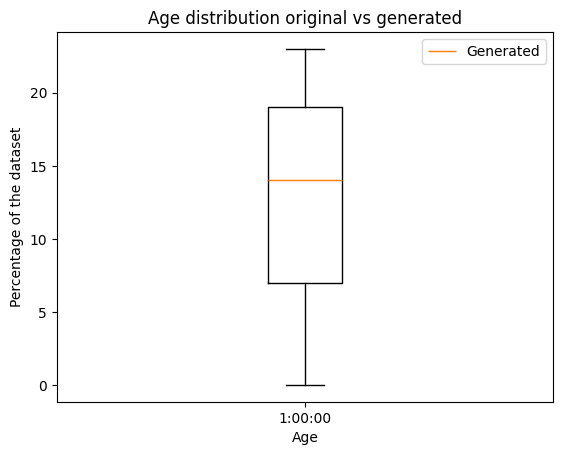

In [6]:
arr = df[df["plan_adm"] == 0]["hour"]


# unique, counts = np.unique(arr, return_counts=True)


fig, ax = plt.subplots()
ax.boxplot(arr, label="Generated")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: str(timedelta(hours=int(x)))))
ax.set_title("Age distribution original vs generated")
ax.set_xlabel("Age")
ax.set_ylabel("Percentage of the dataset")
ax.legend()

print(np.percentile(arr, 25), np.percentile(arr, 50), np.percentile(arr, 75))

In [7]:
np.std(arr), np.mean(arr)

(np.float64(6.958094161859955), np.float64(12.949702183984117))

<BarContainer object of 365 artists>

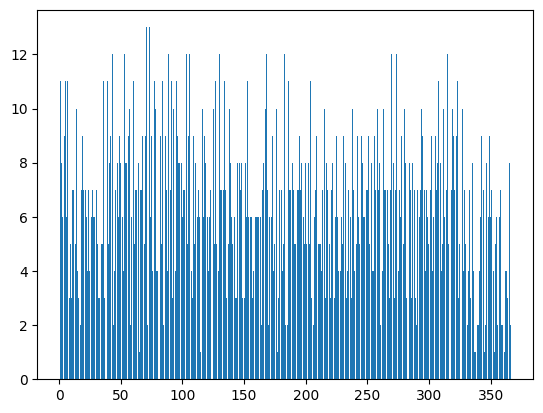

In [8]:
import math

df["year"] = pd.to_datetime(df["adm_icu"]).dt.year
grouped = df.groupby("year")

# for key in grouped.indices: 
arr = grouped.get_group(2016)["date"]
unique, counts = np.unique(arr, return_counts=True)
plt.bar(unique, counts)
# break

np.float64(2.047463936714751)

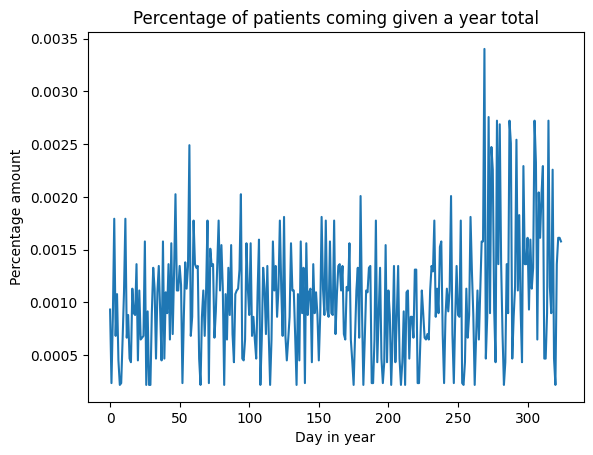

In [ ]:
def get_amount_percentage_by_day(day: int = 1, planned: bool = False) -> float:
    opnames = pd.read_csv("../opnames.csv", delimiter=",")
    opnames = opnames.dropna(subset=["los_icu"])
    opnames["adm_icu"] = pd.to_datetime(opnames["adm_icu"])
    opnames["dis_icu"] = pd.to_datetime(opnames["dis_icu"])
    opnames["adm_icu_date"] = opnames["adm_icu"].dt.date
    opnames["dis_icu_date"] = opnames["dis_icu"].dt.date
    opnames["adm_year"] = opnames["adm_icu"].dt.year
    opnames["adm_day_of_year"] = opnames["adm_icu"].dt.dayofyear
    opnames = opnames[opnames["adm_year"] != 2014]

    all_day_of_year_grouped_opnames = opnames.groupby(["adm_year", "adm_day_of_year"])
    all_year_totals = all_day_of_year_grouped_opnames.size().groupby(level=0).sum()

    opnames = opnames[opnames["plan_adm"] == (planned)]


    day_of_year_grouped_opnames = opnames.groupby(["adm_year", "adm_day_of_year"])

    percentages = day_of_year_grouped_opnames.size() / all_year_totals

    groups = np.sort(list(set([x[0] for x in percentages.keys()])))
    percentages_sum = None
    for group in groups:
        if(type(percentages_sum) == type(None)):
            percentages_sum = percentages.get(group)
        else:
            percentages_sum = percentages_sum.add(percentages.get(group), axis=0, level=0, fill_value=0)
        
        


    percentages_sum = percentages_sum / len(groups)
    
    return percentages_sum[day] if day in percentages_sum else 0

get_amount_percentage_by_day(2, True) * 2200

In [ ]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

opnames = pd.read_csv("opnames.csv", delimiter=",")
opnames["date"] = pd.to_datetime(opnames["adm_icu"]).dt.day_of_year
opnames["year"] = pd.to_datetime(opnames["adm_icu"]).dt.year

filtered_planned = opnames[opnames["plan_adm"] == 1]

percentages_by_year = filtered_planned.groupby("year")["date"].value_counts() / opnames.groupby("year")["date"].count()
current_percentages = None

years = percentages_by_year.index.levels[0][1:]

for key in years:
    if(type(current_percentages) == type(None)):
        current_percentages = percentages_by_year[key]
    else:
        current_percentages = current_percentages.add(percentages_by_year[key], fill_value=0)
        
percentages = current_percentages / len(years)
percentages[365] * 2200




year
2014      21
2015    2174
2016    2355
Name: date, dtype: int64


np.float64(3.425192928588589)

In [48]:
# grouped = opnames.groupby("year")
opnames = pd.read_csv("opnames.csv", delimiter=",")
opnames["date"] = pd.to_datetime(opnames["adm_icu"]).dt.day_of_year
opnames["year"] = pd.to_datetime(opnames["adm_icu"]).dt.year
filtered_planned = opnames[opnames["plan_adm"] == 0]
filtered_planned[filtered_planned["year"] == 2016].groupby("date").get_group(365)

,ref_spec,adm_icu,dis_icu,los_icu,age,gender,nice_ap4_score,icu_death,plan_adm,date,year
4305,2,2016-12-30 07:50:00,2017-01-05 12:32:00,6.195833,81,M,62,0,0.0,365,2016
4315,2,2016-12-30 18:24:00,2016-12-30 21:00:00,0.108333,61,F,48,0,0.0,365,2016
4525,21,2016-12-30 02:19:00,2016-12-30 12:39:00,0.430555,48,M,102,1,0.0,365,2016
4526,21,2016-12-30 06:55:00,2016-12-31 20:30:00,1.565972,62,M,110,1,0.0,365,2016
4527,12,2016-12-30 23:19:00,2017-01-01 15:15:00,1.663888,72,F,105,0,0.0,365,2016
